<a href="https://www.kaggle.com/code/riyosha/mushroom-binary-prediction-eda?scriptVersionId=192965671" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.impute import SimpleImputer

Exploratory Data Analysis

In [31]:
data_path = '/kaggle/input/playground-series-s4e8'
train = pd.read_csv(data_path+'/train.csv')
test = pd.read_csv(data_path+'/test.csv')
samplesubmission = pd.read_csv(data_path+'/sample_submission.csv')

In [3]:
train.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [4]:
test.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [5]:
print(train.shape)
print(train.columns)
print('Test to Train ratio: ', test.shape[0]/train.shape[0])
print(train.describe(include='all'))

(3116945, 22)

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',

       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',

       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',

       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',

       'habitat', 'season'],

      dtype='object')

Test to Train ratio:  0.6666668805513091

                  id    class  cap-diameter cap-shape cap-surface cap-color  \

count   3.116945e+06  3116945  3.116941e+06   3116905     2445922   3116933   

unique           NaN        2           NaN        74          83        78   

top              NaN        p           NaN         x           t         n   

freq             NaN  1705396           NaN   1436026      460777   1359542   

mean    1.558472e+06      NaN  6.309848e+00       NaN         NaN       NaN   

std     8.997847e+05      NaN  4.657931e+00       NaN         NaN       NaN   

min     

In [125]:
samplesubmission.head()

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e


Missing/Wrong Values

In [32]:
print('Rows with at least 1 missing value: ', train.isna().any(axis=1).sum())
print(train.isna().sum())
print(test.isna().sum())
# almost all rows have at least 1 missing values, however,
# stem-root, stem-surface, veil-type, veil-color,spore-print-color have > 50% missing values in both test and train sets. 
# we'll drop these features, assuming they are MCAR or MAR.

Rows with at least 1 missing value:  3116945

id                            0

class                         0

cap-diameter                  4

cap-shape                    40

cap-surface              671023

cap-color                    12

does-bruise-or-bleed          8

gill-attachment          523936

gill-spacing            1258435

gill-color                   57

stem-height                   0

stem-width                    0

stem-root               2757023

stem-surface            1980861

stem-color                   38

veil-type               2957493

veil-color              2740947

has-ring                     24

ring-type                128880

spore-print-color       2849682

habitat                      45

season                        0

dtype: int64

id                            0

cap-diameter                  7

cap-shape                    31

cap-surface              446904

cap-color                    13

does-bruise-or-bleed         10

gill-attachment 

In [35]:
train = train.drop(columns=['stem-root','stem-surface','veil-type','veil-color','spore-print-color'])

In [36]:
for col in train.columns:
    print(col, ':', train[col].unique())

# many values in the categorical columns have entries that don't make sense (numbers or phrases)
# we'll replace them with 'missing'

id : [      0       1       2 ... 3116942 3116943 3116944]

class : ['e' 'p']

cap-diameter : [ 8.8   4.51  6.94 ... 38.11 55.63 54.07]

cap-shape : ['f' 'x' 'p' 'b' 'o' 'c' 's' 'd' 'e' 'n' nan 'w' 'k' 'l' '19.29' '5 f' 't'

 'g' 'z' 'a' '2.85' '7 x' 'r' 'u' '3.55' 'is s' 'y' '4.22' '3.6' '21.56'

 'i' '6 x' '24.16' '8' 'm' 'ring-type' '10.13' 'is p' '7.43' 'h' '0.82'

 '10.46' '2.77' '2.94' '12.62' '5.15' '19.04' '4.97' '49.21' 'b f' '9.13'

 '1.66' '3.37' '7.21' '3.25' '11.12' '3 x' '4.3' '7.41' '6.21' '8.29'

 '54.78' '20.25' '3.52' '3.04' '2.63' '3.91' '6.44' '8.3' '7.6' '17.44'

 '4.33' '2.82' '6.53' '19.06']

cap-surface : ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' '15.94' 'f' 'n' 'r' 'o'

 'a' 'u' 'z' '2.7' 'does l' '5.07' 'p' 'b' 'm' 'cap-diameter' '1.43' 'x'

 '7.14' 'c' 'is h' 'does t' '0.85' '6.57' '12.79' '6.45' '4.66' '23.18'

 '3.06' '16.39' '4.21' 'veil-color' '11.78' '8.1' 'has-ring' 'does h'

 '1.42' 'class' 'has h' 'does None' '10.83' 'season' '8.96' '14.04' '5.

In [37]:
import re
# function to deal with missing and nonsensical values
def clean_cats(string):
    if pd.isna(string):
        return 'missing'
    elif type(string)!=str:
        return 'missing'
    ans=None
    words=string.split()
    for word in words:
        word = re.sub(r'[^a-zA-Z]', '', word)
        if len(word)==1:
            ans=word
    if ans == None or ans=='':
        ans='missing'
    return ans


In [38]:
for col in train.columns:
    if train[col].dtype==object:
     train[col]=train[col].apply(lambda x: clean_cats(x))

In [26]:
print('Rows with at least 1 missing value: ', train.isna().any(axis=1).sum())
print(train.isna().sum())


Rows with at least 1 missing value:  4

id                      0

class                   0

cap-diameter            4

cap-shape               0

cap-surface             0

cap-color               0

does-bruise-or-bleed    0

gill-attachment         0

gill-spacing            0

gill-color              0

stem-height             0

stem-width              0

stem-root               0

stem-surface            0

stem-color              0

veil-type               0

veil-color              0

has-ring                0

ring-type               0

spore-print-color       0

habitat                 0

season                  0

dtype: int64


In [152]:
train=train.dropna()

train['id']=pd.to_numeric(train['id'])
train['cap-diameter']=pd.to_numeric(train['cap-diameter'])
train['stem-height']=pd.to_numeric(train['stem-height'])
train['stem-width']=pd.to_numeric(train['stem-width'])

I've chosen not to impute or replace missing values as my model seemed to perform marginally better when it simply used the missing category instead 

Finding significant features

In [171]:
from scipy.stats import chi2_contingency

# finds if feature is related to class
def significant_features(df, target='class',alpha=0.05):
    ans={}
    for col in df.columns:
        if col!=target and df[col].dtype == 'object':
            contingency_table = pd.crosstab(df[target],df[col])
            chi2, p,_,_ = chi2_contingency(contingency_table)
            if p<alpha:
                ans[col] = p
                print(f'{col} has p-value {p}')
    return ans

In [172]:
sig_features=significant_features(train)

sig_features=list(sig_features.keys())+['cap-diameter','stem-width','stem-height','class']
processed_train=train[sig_features]


cap-shape has p-value 0.0

cap-surface has p-value 0.0

cap-color has p-value 0.0

does-bruise-or-bleed has p-value 0.0

gill-attachment has p-value 0.0

gill-spacing has p-value 0.0

gill-color has p-value 0.0

stem-color has p-value 0.0

has-ring has p-value 0.0

ring-type has p-value 0.0

habitat has p-value 0.0

season has p-value 0.0


Rare Categories

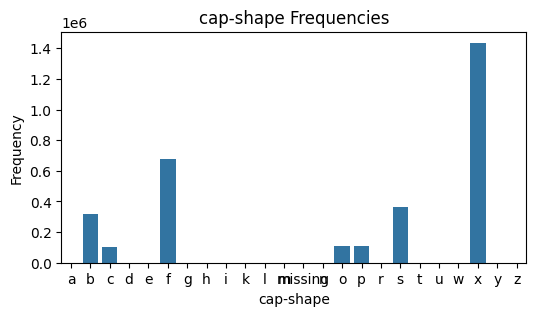

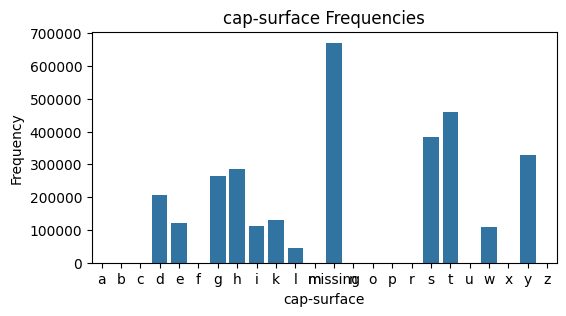

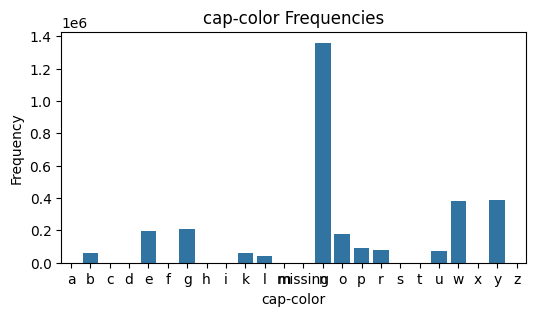

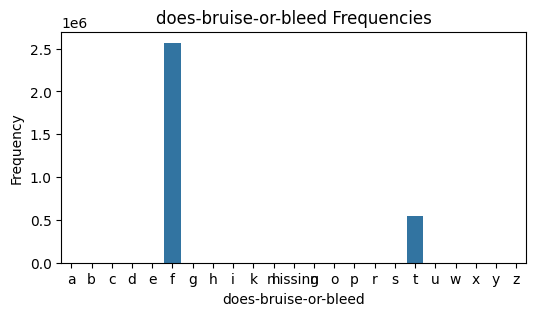

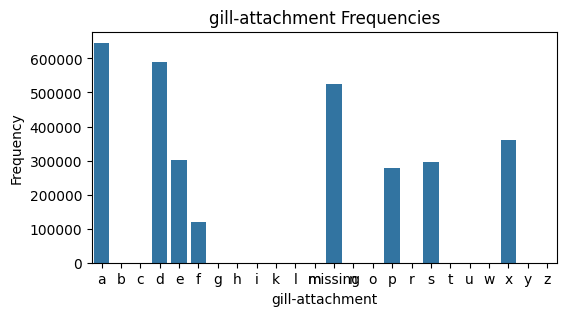

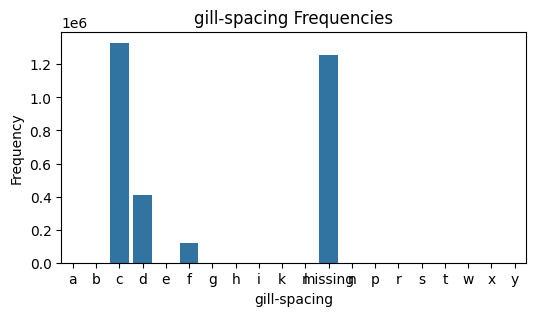

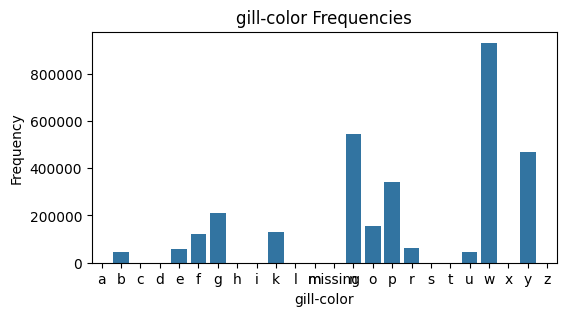

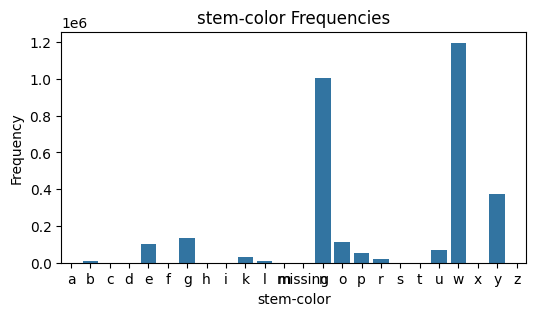

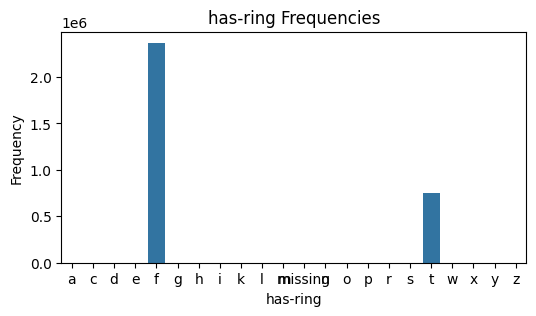

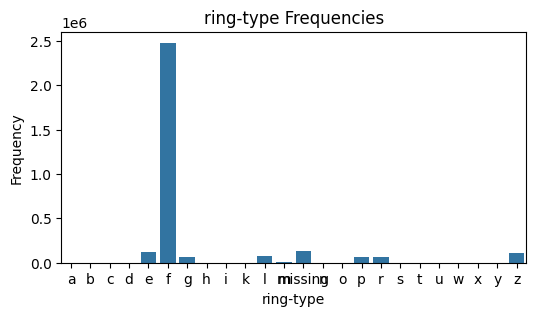

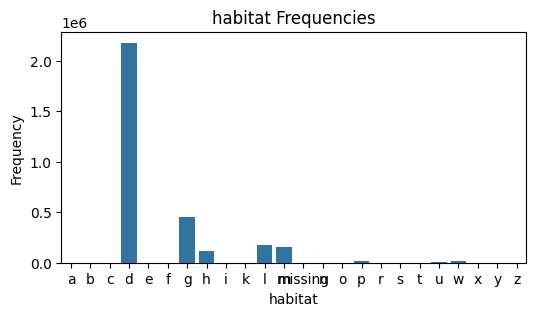

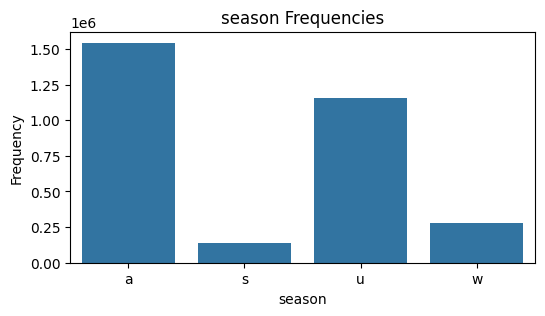

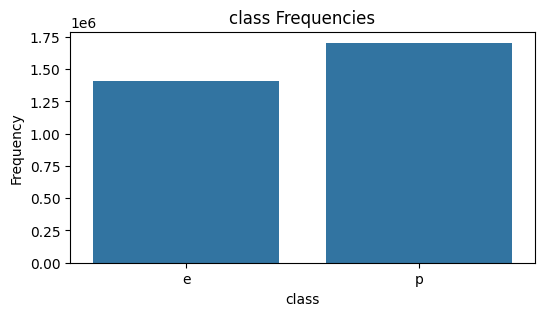

In [78]:
# Many categories in the columns barely have any data. we'll categorise these as noise 

for col in processed_train.columns:
    if processed_train[col].dtype=='category':
        counts = processed_train[col].value_counts().sort_values(ascending=False)
        plt.figure(figsize=(6,3))
        sns.barplot(x=counts.index, y=counts.values)
        plt.title(f'{col} Frequencies')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

In [175]:
#this will return the categories that contain 98% of the entire data. least frequent categories will be removed
def main_categories(df,col,threshold=0.98):
    n = len(df[col])
    counts=df[col].value_counts().sort_values()
    counts =pd.DataFrame({'Category':counts.index,'Frequency':counts.values})
    counts['Proportion']=counts['Frequency']/n
    counts = counts.sort_values(by='Proportion', ascending=True).reset_index(drop=True)
    counts['Cumulative_Proportion'] = counts['Proportion'].cumsum()
    
    return counts[counts['Proportion'] > 1-threshold]['Category'].to_list()

In [ ]:
main_categs={}
for col in processed_train.columns:
    if processed_train[col].dtype=='object':
        main_cats = main_categories(processed_train,col)+['missing']
        main_categs[col]=main_cats
        processed_train[col]=processed_train[col].apply(lambda x: x if x in main_cats else 'noise')
        processed_train[col]=processed_train[col].astype('category')

In [193]:
for col in processed_train.columns:
    print(col, ':', processed_train[col].unique())

cap-shape : ['f', 'x', 'p', 'b', 'o', 'c', 's', 'noise', 'missing']

Categories (9, object): ['b', 'c', 'f', 'missing', ..., 'o', 'p', 's', 'x']

cap-surface : ['s', 'h', 'y', 'noise', 't', ..., 'missing', 'd', 'i', 'w', 'k']

Length: 12

Categories (12, object): ['d', 'e', 'g', 'h', ..., 's', 't', 'w', 'y']

cap-color : ['u', 'o', 'noise', 'g', 'w', ..., 'e', 'y', 'r', 'p', 'missing']

Length: 11

Categories (11, object): ['e', 'g', 'missing', 'n', ..., 'r', 'u', 'w', 'y']

does-bruise-or-bleed : ['f', 't', 'noise', 'missing']

Categories (4, object): ['f', 'missing', 'noise', 't']

gill-attachment : ['a', 'x', 's', 'd', 'e', 'missing', 'f', 'p', 'noise']

Categories (9, object): ['a', 'd', 'e', 'f', ..., 'noise', 'p', 's', 'x']

gill-spacing : ['c', 'missing', 'd', 'f', 'noise']

Categories (5, object): ['c', 'd', 'f', 'missing', 'noise']

gill-color : ['w', 'n', 'g', 'k', 'y', ..., 'p', 'o', 'noise', 'r', 'missing']

Length: 11

Categories (11, object): ['f', 'g', 'k', 'missing', ..

Building the model - XGBoost (to be updated)

In [13]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix, accuracy_score,matthews_corrcoef

C:\Users\riyos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

  from .autonotebook import tqdm as notebook_tqdm


In [187]:
X = processed_train.drop(columns=['class'])
Y = processed_train['class']
print(X.shape,Y.shape)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

(3116941, 15) (3116941,)


In [15]:
def objective(trial):

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'grow_policy':'depthwise',
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('lambda', 1e-8, 10.0, log=True),
        'reg_alpha': trial.suggest_float('alpha', 1e-8, 10.0, log=True),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 10.0),
        'enable_categorical': True
    }

    model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_val)
    mcc = matthews_corrcoef(Y_val, Y_pred)
    trial.set_user_attr("mcc", mcc)
    return mcc

# Define a function for printing MCC score
def print_mcc_callback(study, trial):
    mcc = trial.user_attrs["mcc"]
    print(f"Trial {trial.number}: MCC = {mcc:.5f}, Best MCC = {study.best_value:.5f}")
    print(f"Parameters: {trial.params}")


In [ ]:
'''n_trials = 100
progress_bar = tqdm(total=n_trials)

# Define a custom callback to update the progress bar
def progress_bar_callback(study, trial):
    progress_bar.update(1)

# Example usage: Running the optimization with 100 trials
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=n_trials, callbacks=[print_mcc_callback, progress_bar_callback])

# Close the progress bar
progress_bar.close()

best_params = study.best_params
print(f"Best parameters: {best_params}")'''

In [16]:
parameters ={'n_estimators': 432, 'max_depth': 18, 'learning_rate': 0.019177494166556952, 'subsample': 0.6944494028059239, 'colsample_bytree': 0.5177980824894136, 'gamma': 0.0004342336537981622, 'lambda': 1.3527652792856453e-06, 'alpha': 4.10797226500692e-08, 'scale_pos_weight': 1.0121323580230017,'enable_categorical': True }

In [188]:
#this is a placeholder 
#parameters={'n_estimators': 264, 'max_depth': 10, 'learning_rate': 0.09958639173877007, 'subsample': 0.5020370491020979, 'colsample_bytree': 0.5534987128808537, 'gamma': 0.00014152005369431255, 'lambda': 0.002913558468518662, 'alpha': 0.0034523698551322235, 'scale_pos_weight': 1.6386145533501653,'enable_categorical':True}
parameters = {
    'n_estimators': 100,  # Fewer trees
    'max_depth': 5,       # Simpler model
    'learning_rate': 0.1, 
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'lambda': 1.0,
    'alpha': 1.0,
    'scale_pos_weight': 1.0,
    'enable_categorical': True
}

In [189]:
model = XGBClassifier(**parameters)
model = model.fit(X, Y)

In [64]:
Y_pred = model.predict(X_val)
mcc = matthews_corrcoef(Y_val, Y_pred)
print(f"Matthews Correlation Coefficient: {mcc}")

Matthews Correlation Coefficient: 0.9708733534488072


In [194]:
# now let's preprocess the test df as well
test['cap-diameter']=pd.to_numeric(test['cap-diameter'])
test['stem-height']=pd.to_numeric(test['stem-height'])
test['stem-width']=pd.to_numeric(test['stem-width'])
sig_features.remove('class')
processed_test=test[sig_features]


for col in processed_test.columns:
    if processed_test[col].dtype==object:
        processed_test[col]=processed_test[col].apply(lambda x: clean_cats(x))
        main_cats=main_categs[col]
        processed_test[col]=processed_test[col].apply(lambda x: x if x in main_cats else 'noise')
        processed_test[col]=processed_train[col].astype('category')
     

C:\Users\riyos\AppData\Local\Temp\ipykernel_15216\3743290396.py:11: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  processed_test[col]=processed_test[col].apply(lambda x: clean_cats(x))

C:\Users\riyos\AppData\Local\Temp\ipykernel_15216\3743290396.py:13: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  processed_test[col]=processed_test[col].apply(lambda x: x if x in main_cats else 'noise')

C:\Users\riyos\AppData\Local\Temp\ipykernel_15216\3743290396.py:14: SettingWithCopyWarning: 

A value is trying

In [60]:
id = test.pop('id')

KeyError: 'id'

In [195]:

# Make predictions on the test data
y_test_pred = model.predict(processed_test)
y_test_pred_binary = (y_test_pred > 0.502).astype(int)  # Convert probabilities to binary outcomes

# Create the submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'class': y_test_pred_binary
})

# Map the binary predictions to 'e' and 'p'
submission_df['class'] = np.where(submission_df['class'] == 1, 'p', 'e')

# Save the submission DataFrame to a CSV file
submission_df.to_csv('XGboost_model5.1_submission.csv', index=False)
print("Submission file created: submission.csv")


Submission file created: submission.csv


LightGBM Boosting